In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Функция с занятия

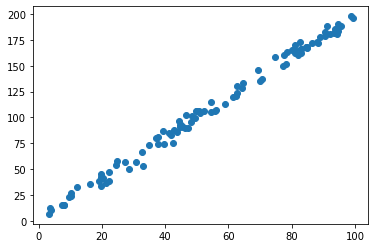

In [2]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

### Градиентный спуск без надстроек

In [3]:
def cost_function(x, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*x[i] - y[i]) ** 2
    return total_cost / (2 * len(x))

In [4]:
def der_theta0(x, y, theta0, theta1):
    total_cost = 0
    for i in range(len(x)):
        total_cost += (theta0 + theta1*x[i] - y[i])
    return total_cost / (len(x))    

In [5]:
def der_theta1(x, y, theta0, theta1):
    total_cost = 0
    for i in range(len(x)):
        total_cost += (theta0 + theta1*x[i] - y[i]) * x[i]
    return total_cost / (len(x))  

In [6]:
epochs_gd = 20
lr_gd = 0.0001

In [7]:
theta0 = 1
theta1 = 1
for _ in range(epochs_gd):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 -= lr_gd * dt0
    theta1 -= lr_gd * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0053379099117952 t1: 1.3622105737775485 cost: 725.888000154746
t0: 1.0087250566544506 t1: 1.5914033080671415 cost: 296.95519025138873
t0: 1.0108778355401895 t1: 1.7364274864797378 cost: 125.21606354943664
t0: 1.012249553878029 t1: 1.8281930506677586 cost: 56.453945108981664
t0: 1.013127047040707 t1: 1.8862586189430948 cost: 28.922482486036312
t0: 1.0136918133835733 t1: 1.923000130237364 cost: 17.899238618442226
t0: 1.0140586980621629 t1: 1.9462486011385849 cost: 13.485670999630688
t0: 1.0143003706592093 t1: 1.9609591967571105 cost: 11.718531851561309
t0: 1.0144628136824667 t1: 1.970267354362788 cost: 11.010988270327275
t0: 1.0145751230884534 t1: 1.9761570576684115 cost: 10.727692983705715
t0: 1.014655709675692 t1: 1.9798836950086431 cost: 10.614261200880193
t0: 1.014716223087048 t1: 1.982241627678207 cost: 10.568840557595895
t0: 1.014764034766989 t1: 1.9837334968512585 cost: 10.550650690879852
t0: 1.014803809081127 t1: 1.9846773544666751 cost: 10.54336367337984
t0: 1.014838497460

### Градиентный спуск c надстройкой RMSProp

In [19]:
theta0_rms = 1
theta1_rms = 1
epochs_rms = 20
lr_rms = 0.08
eps = 1e-8
gamma_rms = 0.9

In [20]:
theta = np.array([theta0_rms, theta1_rms])
expected_grad = np.array([0,0])

In [21]:
for epoch in range(epochs_rms):
    grad = np.asarray([der_theta0(X,Y,theta[0],theta[1]), der_theta1(X,Y,theta[0],theta[1])])
    expected_grad = gamma_rms * expected_grad + (1 - gamma_rms) * np.square(grad)
    RMS_grad = np.sqrt(expected_grad + eps)
    
    delta_theta = -(lr_rms/RMS_grad) * grad
    theta = theta + delta_theta
    print(f"theta0: {theta[0]}, theta1: {theta[1]}, cost: {cost_function(X, Y, theta[0], theta[1])}")

theta0: 1.252982212809031, theta1: 1.2529822128134693, cost: 988.3202337989475
theta0: 1.4085886485031993, theta1: 1.4085517814975077, cost: 611.0484808129651
theta0: 1.5232268705543184, theta1: 1.5231316390681033, cost: 391.68731687741354
theta0: 1.613245697122374, theta1: 1.6130730414363301, cost: 254.26494156438176
theta0: 1.6859709707104216, theta1: 1.6857018966712431, cost: 165.6120451353023
theta0: 1.7454582776405008, theta1: 1.7450731517296665, cost: 107.9549208038611
theta0: 1.794283246107543, theta1: 1.7937616036550064, cost: 70.61684969449612
theta0: 1.8342610838849602, theta1: 1.8335816650109726, cost: 46.74157361301042
theta0: 1.8667827129493881, theta1: 1.8659236181896328, cost: 31.76154288681014
theta0: 1.8929860094527904, theta1: 1.8919249135039085, cost: 22.5859041592068
theta0: 1.913846230427445, theta1: 1.9125606074643817, cost: 17.122983287475897
theta0: 1.930223160670482, theta1: 1.9286904835053362, cost: 13.973972691112555
theta0: 1.9428840757815418, theta1: 1.9410

### Градиентный спуск c надстройкой Nesterov Momentum

In [67]:
theta0_nest = 1
theta1_nest = 1
epochs_nest = 20
lr_nest = 0.0005
gamma_nest = 0.2

In [68]:
theta = np.array([theta0_nest, theta1_nest])
velocity = np.array([0, 0])

In [69]:
for epoch in range(epochs_nest):
    
    look_ahead_theta = theta - gamma_nest*velocity
    grad = np.asarray([der_theta0(X,Y,theta[0],theta[1]), der_theta1(X,Y,theta[0],theta[1])])
    
    velocity = gamma_nest * velocity + lr_nest * grad
    theta = theta - velocity

    print(f"theta0: {theta[0]}, theta1: {theta[1]}, cost: {cost_function(X, Y, theta[0], theta[1])}")

theta0: 1.0266895495589758, theta1: 2.8110528688877423, cost: 1259.7939940118542
theta0: 1.0099479298012515, theta1: 1.6588703243541436, cost: 207.44600415641094
theta0: 1.0155465951339062, theta1: 2.0296659638675028, cost: 13.991889354141952
theta0: 1.0156282509044041, theta1: 2.0242005752649086, cost: 13.17651316640176
theta0: 1.0147535988084326, theta1: 1.9535141329499828, cost: 12.512368717511652
theta0: 1.0155910870170457, theta1: 1.9995730652891288, cost: 10.862111382498261
theta0: 1.0155306223564264, theta1: 1.9844036244493375, cost: 10.544873092553305
theta0: 1.0156989770554592, theta1: 1.9848381679008196, cost: 10.542148568900702
theta0: 1.0159013130135977, theta1: 1.9875912418422015, cost: 10.541344305879921
theta0: 1.0160362279740858, theta1: 1.9857484867560797, cost: 10.53871855980858
theta0: 1.0162072004740623, theta1: 1.986365860133871, cost: 10.538157368511271
theta0: 1.016368678557386, theta1: 1.9863372835246729, cost: 10.538108835009023
theta0: 1.0165289463352323, thet